<a href="https://colab.research.google.com/github/newmantic/Crank_Nicolson/blob/main/Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

In [41]:
def crank_nicolson(u0, alpha, L, T, M, N):
    """
    Solves the heat equation using the Crank-Nicolson method.

    :param u0: Initial temperature distribution (1D array).
    :param alpha: Thermal diffusivity constant.
    :param L: Length of the rod (spatial domain).
    :param T: Total time (time domain).
    :param M: Number of spatial points.
    :param N: Number of time steps.
    :return: 2D array of temperature distribution over time and space.
    """
    dx = L / (M - 1)
    dt = T / N
    r = alpha * dt / (dx ** 2)

    # Initialize the solution matrix
    u = np.zeros((N + 1, M))
    u[0, :] = u0

    # Tridiagonal matrix A (implicit scheme) for the interior points
    A = np.zeros((3, M-2))
    A[0, 1:] = -r / 2  # Lower diagonal
    A[1, :] = 1 + r  # Main diagonal
    A[2, :-1] = -r / 2  # Upper diagonal

    # Tridiagonal matrix B (explicit scheme) for the interior points
    B = np.zeros((3, M-2))
    B[0, 1:] = r / 2  # Lower diagonal
    B[1, :] = 1 - r  # Main diagonal
    B[2, :-1] = r / 2  # Upper diagonal

    # Time-stepping loop
    for n in range(0, N):
        # Compute the right-hand side (rhs) using the current time step

        rhs = (B[0, :] * u[n, :-2] +  # Align with interior points
               B[1, :] * u[n, 1:-1] +
               B[2, :] * u[n, 2:])

        # Solve the linear system A * u_star = rhs to get u_star (interior points)
        u_star = solve_banded((1, 1), A, rhs)

        # Update the solution for the next time step
        u[n+1, 1:-1] = u_star

        # Apply boundary conditions (assuming Dirichlet conditions: u=0 at boundaries)
        u[n+1, 0] = u[n+1, -1] = 0

    return u

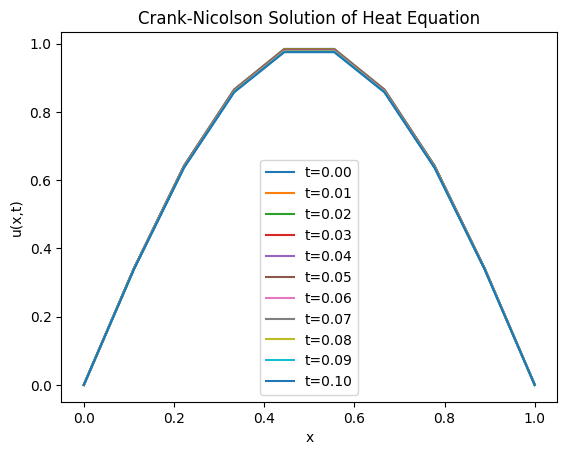

In [42]:
def test_case_1():
    # Parameters
    L = 1.0  # Length of the rod
    T = 0.1  # Total time
    M = 10  # Number of spatial points
    N = 100  # Number of time steps
    alpha = 0.01  # Thermal diffusivity

    # Initial condition: u(x,0) = sin(pi*x)
    x = np.linspace(0, L, M)
    u0 = np.sin(np.pi * x)

    # Solve using Crank-Nicolson
    u = crank_nicolson(u0, alpha, L, T, M, N)

    # Plot the result
    for n in range(0, N+1, N//10):
        plt.plot(x, u[n, :], label=f't={n*T/N:.2f}')

    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    plt.title('Crank-Nicolson Solution of Heat Equation')
    plt.legend()
    plt.show()

test_case_1()